<a href="https://colab.research.google.com/github/vortexash/BI-machine-learning/blob/master/tensorflow1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression

In [0]:
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plot

In [0]:
train_X=[[1],[2],[3],[4],[5],[6],[7],[8],[9]]

In [0]:
train_y=[1,4,9,16,25,36,49,64,81]

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import tree

In [15]:
reg1= LinearRegression()
reg1.fit(train_X ,train_y)
reg2=tree.DecisionTreeRegressor()
reg2.fit(train_X ,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

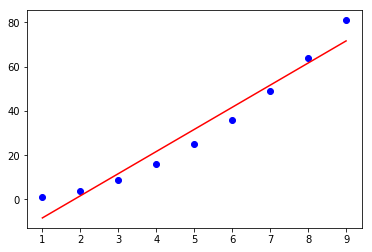

In [9]:
plot.scatter(train_X,train_y,color='blue')
plot.plot(train_X,reg1.predict(train_X),color='red')

In [17]:
reg2.predict([[7]])

array([49.])

Tensorflow based implementation

In [0]:
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

In [0]:
# Create weights and bias
W =tf.Variable(tf.random_normal(shape=(1,)),name='weight')
b=tf.Variable(tf.random_normal(shape=(1,)),name='bias')

In [0]:
learning_rate = 0.1
epochs =40
display_step =1

In [0]:
pred = tf.add(tf.multiply(X,W),b)

In [0]:
num_records=len(train_X)

In [0]:
# Define cost function
cost =tf.reduce_sum(tf.pow(pred-Y,2))/(2*num_records)
# Have optimiser
optimizer =tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Populating the interactive namespace from numpy and matplotlib
Epochs: 1 cost= 6208.77295
Epochs: 2 cost= 6250.49658
Epochs: 3 cost= 6255.71777
Epochs: 4 cost= 6261.18457
Epochs: 5 cost= 6266.98438
Epochs: 6 cost= 6273.09668
Epochs: 7 cost= 6279.49512
Epochs: 8 cost= 6286.15479
Epochs: 9 cost= 6293.06104
Epochs: 10 cost= 6300.18750
Epochs: 11 cost= 6307.51660
Epochs: 12 cost= 6315.03271
Epochs: 13 cost= 6322.71387
Epochs: 14 cost= 6330.54639
Epochs: 15 cost= 6338.51611
Epochs: 16 cost= 6346.60400
Epochs: 17 cost= 6354.80029
Epochs: 18 cost= 6363.09180
Epochs: 19 cost= 6371.46143
Epochs: 20 cost= 6379.90088
Epochs: 21 cost= 6388.39893
Epochs: 22 cost= 6396.94629
Epochs: 23 cost= 6405.52881
Epochs: 24 cost= 6414.14160
Epochs: 25 cost= 6422.77197
Epochs: 26 cost= 6431.41406
Epochs: 27 cost= 6440.06104
Epochs: 28 cost= 6448.70312
Epochs: 29 cost= 6457.33447
Epochs: 30 cost= 6465.94873
Epochs: 31 cost= 6474.53809
Epochs: 32 cost= 6483.09961
Epochs: 33 cost= 6491.62695
Epochs: 34 cost= 6500.

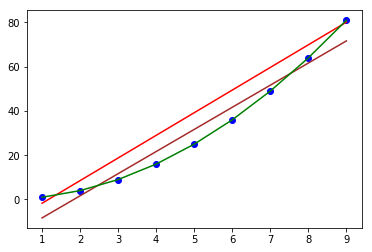

[[100.59405994]]


In [76]:
% pylab inline
init =tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for(x,y) in zip(train_X,train_y):
      sess.run(optimizer,feed_dict={X:x,Y:y})
    if(epoch+1) % display_step ==0:
      c =sess.run(cost,feed_dict={X:train_X,Y:train_y})
      print("Epochs:",'%d'%(epoch+1),'cost=','{:.5f}'.format(c))
  print('completed model training')
  training_cost = sess.run(cost,feed_dict={X:train_X,Y:train_y})
  print('Cost post training =',training_cost,'W=',sess.run(W),'bias=',sess.run(b))
  plt.plot(train_X,train_y,'bo')
  plt.plot(train_X,sess.run(W)*train_X+sess.run(b),'r')
  plt.plot(train_X,reg1.predict(train_X),color='brown')
  plt.plot(train_X,reg2.predict(train_X),color='green')
  plt.show()
  print(sess.run(W)*[[11]]+sess.run(b))

In [66]:
print(zip(train_X,train_y))